In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import sklearn
from sklearn import svm

label_to_name = {
    '0': 'airplane',
    '1': 'cabinet',
    '2': 'car',
    '3': 'chair',
    '4': 'lamp',
    '5': 'sofa',
    '6': 'table',
    '7': 'watercraft',
    '8': 'bed',
    '9': 'bench',
    '10': 'bookshelf',
    '11': 'bus',
    '12': 'guitar',
    '13': 'motorbike',
    '14': 'pistol',
    '15': 'skateboard',
}

label_list=[0,1,12,15]

# Adapted from Beier et al: https://github.com/Gorgotha/LGW
def svm_cross_val(dist, X,y, gamma=10, k=10):
    dist_sq=dist
    k_folds = sklearn.model_selection.StratifiedKFold(n_splits = 10)
    k_folds.get_n_splits(X,y)

    dist = dist / dist.max()

    accs = []

    for train_index, test_index in k_folds.split(X, y):
        
        # get train and test data for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # set up SVM
        kernel_train = np.exp(-gamma * dist[X_train].T[X_train].T)
        svc = svm.SVC(kernel="precomputed")
        
        # fit SVM
        clf = svc.fit(kernel_train, y_train)

        kernel_test = np.exp(-gamma * dist_sq[X_test].T[X_train].T)
        acc = clf.score(kernel_test, y_test)
        accs.append(acc)

    return accs, np.mean(accs)

In [83]:
gw=np.load('results/gw_500.npz')['dist']
gw_time=np.load('results/gw_500.npz')['time']

lgw_square=np.load('results/lgw_500_square.npz')['dist']
lgw_square_time=np.load('results/lgw_500_square.npz')['time']
lgw_sqrt=np.load('results/lgw_500_sqrt.npz')['dist']
lgw_sqrt_time=np.load('results/lgw_500_sqrt.npz')['time']

pgw_03=np.load('results/pgw_500_0.030.npz')['dist']
pgw_03_time=np.load('results/pgw_500_0.100.npz')['time']
pgw_05=np.load('results/pgw_500_0.050.npz')['dist']
pgw_05_time=np.load('results/pgw_500_0.100.npz')['time']
pgw_10=np.load('results/pgw_500_0.100.npz')['dist']
pgw_10_time=np.load('results/pgw_500_0.100.npz')['time']


lpgw_02_sqrt_1=np.load('results/lpgw_500_0.020_sqrt_1.npz')['dist']
lpgw_02_sqrt_1_time=np.load('results/lpgw_500_0.020_sqrt_1.npz')['time']
lpgw_02_sqrt_2=np.load('results/lpgw_500_0.020_sqrt_2.npz')['dist']
lpgw_02_sqrt_2_time=np.load('results/lpgw_500_0.020_sqrt_2.npz')['time']
lpgw_03_sqrt_1=np.load('results/lpgw_500_0.030_sqrt_1.npz')['dist']
lpgw_03_sqrt_1_time=np.load('results/lpgw_500_0.030_sqrt_1.npz')['time']
lpgw_03_sqrt_2=np.load('results/lpgw_500_0.030_sqrt_2.npz')['dist']
lpgw_03_sqrt_2_time=np.load('results/lpgw_500_0.030_sqrt_2.npz')['time']
lpgw_05_sqrt_1=np.load('results/lpgw_500_0.050_sqrt_1.npz')['dist']
lpgw_05_sqrt_1_time=np.load('results/lpgw_500_0.050_sqrt_1.npz')['time']
lpgw_05_sqrt_2=np.load('results/lpgw_500_0.050_sqrt_2.npz')['dist']
lpgw_05_sqrt_2_time=np.load('results/lpgw_500_0.050_sqrt_2.npz')['time']
lpgw_10_sqrt_1=np.load('results/lpgw_500_0.100_sqrt_1.npz')['dist']
lpgw_10_sqrt_1_time=np.load('results/lpgw_500_0.100_sqrt_1.npz')['time']
lpgw_10_sqrt_2=np.load('results/lpgw_500_0.100_sqrt_2.npz')['dist']
lpgw_10_sqrt_2_time=np.load('results/lpgw_500_0.100_sqrt_2.npz')['time']

lpgw_02_square_1=np.load('results/lpgw_500_0.020_square_1.npz')['dist']
lpgw_02_square_1_time=np.load('results/lpgw_500_0.020_square_1.npz')['time']
lpgw_02_square_2=np.load('results/lpgw_500_0.020_square_2.npz')['dist']
lpgw_02_square_2_time=np.load('results/lpgw_500_0.020_square_2.npz')['time']
lpgw_03_square_1=np.load('results/lpgw_500_0.030_square_1.npz')['dist']
lpgw_03_square_1_time=np.load('results/lpgw_500_0.030_square_1.npz')['time']
lpgw_03_square_2=np.load('results/lpgw_500_0.030_square_2.npz')['dist']
lpgw_03_square_2_time=np.load('results/lpgw_500_0.030_square_2.npz')['time']
lpgw_05_square_1=np.load('results/lpgw_500_0.050_square_1.npz')['dist']
lpgw_05_square_1_time=np.load('results/lpgw_500_0.050_square_1.npz')['time']
lpgw_05_square_2=np.load('results/lpgw_500_0.050_square_2.npz')['dist']
lpgw_05_square_2_time=np.load('results/lpgw_500_0.050_square_2.npz')['time']
lpgw_10_square_1=np.load('results/lpgw_500_0.100_square_1.npz')['dist']
lpgw_10_square_1_time=np.load('results/lpgw_500_0.100_square_1.npz')['time']
lpgw_10_square_2=np.load('results/lpgw_500_0.100_square_2.npz')['dist']
lpgw_10_square_2_time=np.load('results/lpgw_500_0.100_square_2.npz')['time']


In [84]:
# gw = np.load('results_master/FINAL2_labels_0.2.12.15_s1_1024_s2_768_ratio_3_n_10_GW.npz')['dist']
# pgw = np.load('results_master/FINAL_NONORM_labels_0.2.12.15_s1_1024_s2_768_ratio_3_n_10_PGW_0.2.npz')['dist']
# lgw = np.load('results_master/FINAL_labels_0.2.12.15_s1_1024_s2_768_ratio_3_n_10_LGW.npz')['dist']
# lpgw = np.load('results_master/labels_0.2.12.15_s1_1024_s2_768_ratio_3_n_10_LPGW_0.3.npz')['dist'] # Or use LPGW_0.2

# # gw = np.log1p(gw)
# # pgw = np.log1p(pgw)
# # lgw = np.log1p(lgw)
# # lpgw = np.log1p(lpgw)

# gw.shape, pgw.shape, lgw.shape, lpgw.shape

In [85]:
X = np.arange(240)
labels = []
for m in [1, 3]:
    for i in label_list:
        labels += [i] * (m * 15)
labels = np.array(labels)

gammas = [0.01, 0.1, 0.5, 1, 2.5, 5, 10, 100]

In [86]:
accs_gw = [svm_cross_val(gw/gw.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
gw = gw

print(f"Best GW: {np.max(accs_gw)}")
print(f"GW Time: {gw_time/60}")

Best GW: 0.9291666666666666
GW Time: 203.61092224915822


In [87]:
# accs_lgw_square = [svm_cross_val(lgw_square/lgw_square.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LGW Square: {np.max(accs_lgw_square)}")
# print(f"LGW Square Time: {lgw_square_time}")

accs_lgw_sqrt = [svm_cross_val(lgw_sqrt/lgw_sqrt.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
lgw = lgw_sqrt
print(f"Best LGW Sqrt: {np.max(accs_lgw_sqrt)}")
print(f"LGW Sqrt Time: {lgw_sqrt_time/60}")

Best LGW Sqrt: 0.925
LGW Sqrt Time: 1.2972955147425334


In [95]:
accs_pgw_03 = [svm_cross_val(pgw_03/pgw_03.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
print(f"Best PGW 0.03: {np.max(accs_pgw_03)}")
print(f"PGW 0.03 Time: {pgw_03_time}")

accs_pgw_05 = [svm_cross_val(pgw_05/pgw_05.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
pgw = pgw_05
print(f"Best PGW 0.05: {np.max(accs_pgw_05)}")
print(f"PGW 0.05 Time: {pgw_05_time}")

accs_pgw_10 = [svm_cross_val(pgw_10/pgw_10.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# pgw = pgw_10
print(f"Best PGW 0.10: {np.max(accs_pgw_10)}")
print(f"PGW 0.10 Time: {pgw_10_time/60}")

Best PGW 0.03: 0.9333333333333333
PGW 0.03 Time: 55041.47207593918
Best PGW 0.05: 0.9375
PGW 0.05 Time: 55041.47207593918
Best PGW 0.10: 0.9375
PGW 0.10 Time: 917.3578679323197


In [89]:
# accs_lpgw_02_sqrt_1 = [svm_cross_val(lpgw_02_sqrt_1/lpgw_02_sqrt_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.02 Sqrt 1: {np.max(accs_lpgw_02_sqrt_1)}")
# print(f"LPGW 0.02 Sqrt 1 Time: {lpgw_02_sqrt_1_time}")

# accs_lpgw_02_sqrt_2 = [svm_cross_val(lpgw_02_sqrt_2/lpgw_02_sqrt_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.02 Sqrt 2: {np.max(accs_lpgw_02_sqrt_2)}")
# print(f"LPGW 0.02 Sqrt 2 Time: {lpgw_02_sqrt_2_time}")

# accs_lpgw_03_sqrt_1 = [svm_cross_val(lpgw_03_sqrt_1/lpgw_03_sqrt_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.03 Sqrt 1: {np.max(accs_lpgw_03_sqrt_1)}")
# print(f"LPGW 0.03 Sqrt 1 Time: {lpgw_03_sqrt_1_time}")

accs_lpgw_03_sqrt_2 = [svm_cross_val(lpgw_03_sqrt_2/lpgw_03_sqrt_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
lpgw = lpgw_03_sqrt_2
print(f"Best LPGW 0.03 Sqrt 2: {np.max(accs_lpgw_03_sqrt_2)}")
print(f"LPGW 0.03 Sqrt 2 Time: {lpgw_03_sqrt_2_time/60}")

# accs_lpgw_05_sqrt_1 = [svm_cross_val(lpgw_05_sqrt_1/lpgw_05_sqrt_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.05 Sqrt 1: {np.max(accs_lpgw_05_sqrt_1)}")
# print(f"LPGW 0.05 Sqrt 1 Time: {lpgw_05_sqrt_1_time}")

# accs_lpgw_05_sqrt_2 = [svm_cross_val(lpgw_05_sqrt_2/lpgw_05_sqrt_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.05 Sqrt 2: {np.max(accs_lpgw_05_sqrt_2)}")
# print(f"LPGW 0.05 Sqrt 2 Time: {lpgw_05_sqrt_2_time}")

# accs_lpgw_10_sqrt_1 = [svm_cross_val(lpgw_10_sqrt_1/lpgw_10_sqrt_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.10 Sqrt 1: {np.max(accs_lpgw_10_sqrt_1)}")
# print(f"LPGW 0.10 Sqrt 1 Time: {lpgw_10_sqrt_1_time}")

# accs_lpgw_10_sqrt_2 = [svm_cross_val(lpgw_10_sqrt_2/lpgw_10_sqrt_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.10 Sqrt 2: {np.max(accs_lpgw_10_sqrt_2)}")
# print(f"LPGW 0.10 Sqrt 2 Time: {lpgw_10_sqrt_2_time}")

# accs_lpgw_02_square_1 = [svm_cross_val(lpgw_02_square_1/lpgw_02_square_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.02 Square 1: {np.max(accs_lpgw_02_square_1)}")
# print(f"LPGW 0.02 Square 1 Time: {lpgw_02_square_1_time}")

# accs_lpgw_02_square_2 = [svm_cross_val(lpgw_02_square_2/lpgw_02_square_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.02 Square 2: {np.max(accs_lpgw_02_square_2)}")
# print(f"LPGW 0.02 Square 2 Time: {lpgw_02_square_2_time}")

# accs_lpgw_03_square_1 = [svm_cross_val(lpgw_03_square_1/lpgw_03_square_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.03 Square 1: {np.max(accs_lpgw_03_square_1)}")
# print(f"LPGW 0.03 Square 1 Time: {lpgw_03_square_1_time}")

# accs_lpgw_03_square_2 = [svm_cross_val(lpgw_03_square_2/lpgw_03_square_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.03 Square 2: {np.max(accs_lpgw_03_square_2)}")
# print(f"LPGW 0.03 Square 2 Time: {lpgw_03_square_2_time}")

# accs_lpgw_05_square_1 = [svm_cross_val(lpgw_05_square_1/lpgw_05_square_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.05 Square 1: {np.max(accs_lpgw_05_square_1)}")
# print(f"LPGW 0.05 Square 1 Time: {lpgw_05_square_1_time}")

# accs_lpgw_05_square_2 = [svm_cross_val(lpgw_05_square_2/lpgw_05_square_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.05 Square 2: {np.max(accs_lpgw_05_square_2)}")
# print(f"LPGW 0.05 Square 2 Time: {lpgw_05_square_2_time}")

# accs_lpgw_10_square_1 = [svm_cross_val(lpgw_10_square_1/lpgw_10_square_1.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.10 Square 1: {np.max(accs_lpgw_10_square_1)}")
# print(f"LPGW 0.10 Square 1 Time: {lpgw_10_square_1_time}")

# accs_lpgw_10_square_2 = [svm_cross_val(lpgw_10_square_2/lpgw_10_square_2.max(),X,labels,gamma=gamma)[1] for gamma in gammas]
# print(f"Best LPGW 0.10 Square 2: {np.max(accs_lpgw_10_square_2)}")
# print(f"LPGW 0.10 Square 2 Time: {lpgw_10_square_2_time}")

Best LPGW 0.03 Sqrt 2: 0.9291666666666666
LPGW 0.03 Sqrt 2 Time: 1.8010841488838196


In [97]:
gw.shape, lgw.shape, pgw.shape, lpgw.shape

((240, 240), (240, 240), (240, 240), (240, 240))

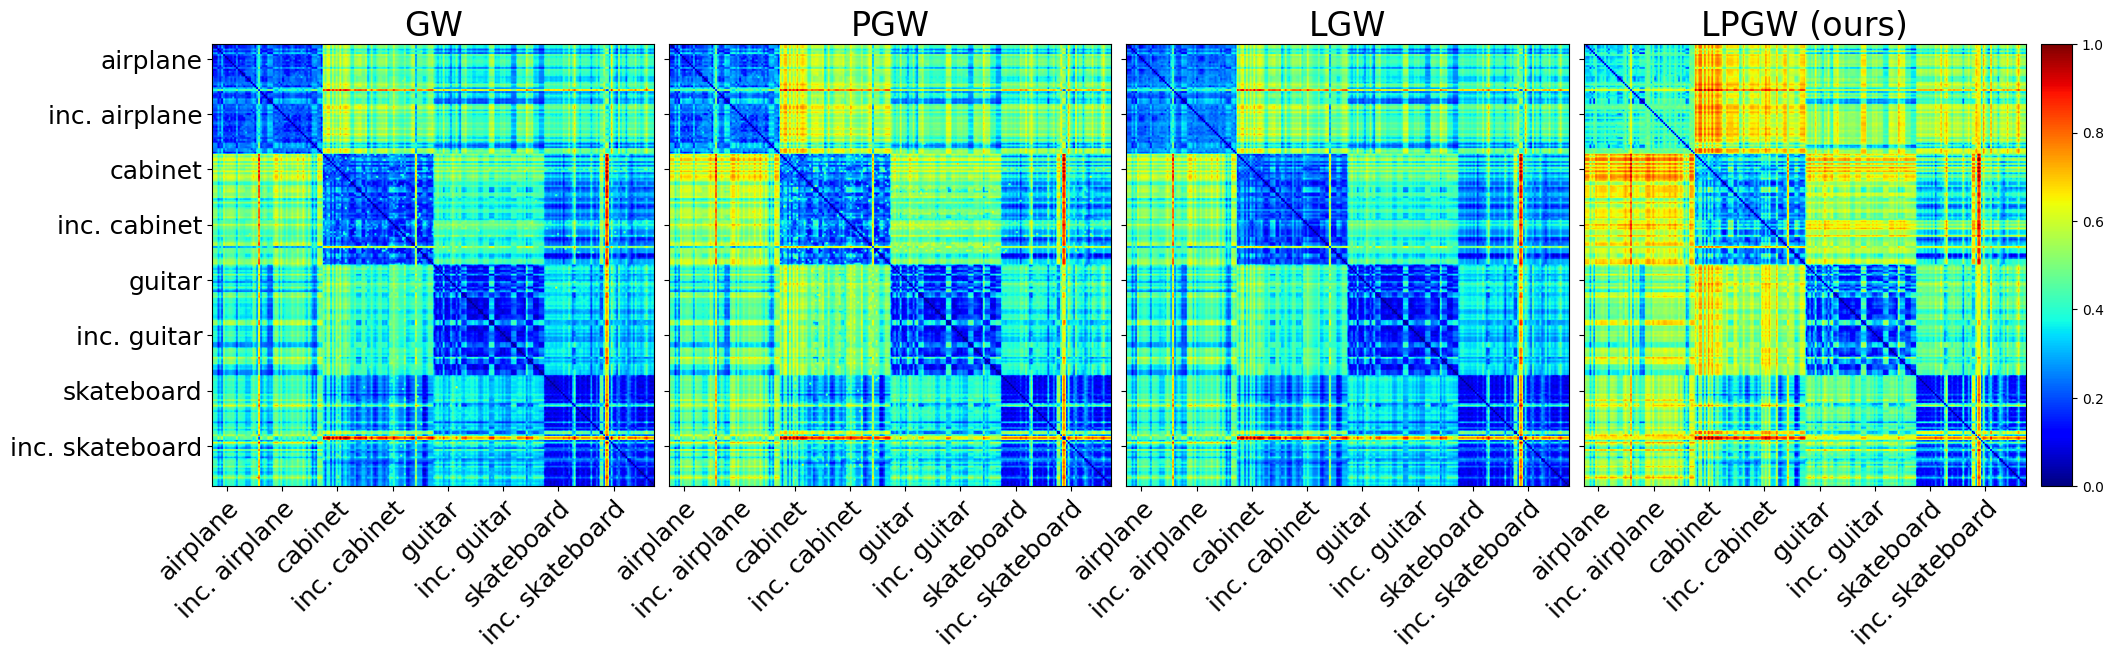

In [96]:
shape_labels=[]
for i in label_list:
    shape_labels.append(label_to_name[str(i)])
    shape_labels.append(f"inc. {label_to_name[str(i)]}")

def plot_dists(dists, labels,shape_labels,size=20,width=None):
    if width is None:
        width=len(dists)
    fig = plt.figure(figsize=(len(dists) * 6, 6))
    min_val, max_val = 0, 1

    grid = ImageGrid(fig, 111,          
                     nrows_ncols=(1,len(dists)),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )
    
    x = [15/2, 15 + 45/2, 60 + 15/2, 60 + 15 + 45/2, 120 + 15/2, 120 + 15 + 45/2, 180 + 15/2, 180 + 15 + 45/2]
    plt.setp(grid, xticks=x, xticklabels=shape_labels, yticks=x, yticklabels=shape_labels)
    
    for data, ax, title in zip(dists, grid, labels):
        data = data/np.max(data)
        im = ax.imshow(data, vmin = min_val, vmax = max_val,cmap = "jet")

        ax.set_title(title, fontsize=24)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=18)
        plt.setp(ax.get_yticklabels(), fontsize=18)
    
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)

current_labels = labels

desired_labels = current_labels.copy()
desired_labels.sort()

def reorder_dist(dist,current_labels,desired_labels):
    n=dist.shape[0]
    # Create the mapping from current label positions to desired positions
    current_to_new_indices = sorted(range(n), key=lambda i: desired_labels.index(current_labels[i]))
    
    # Reorder the matrix according to the new indices
    reordered_matrix = dist[np.ix_(current_to_new_indices, current_to_new_indices)]
    return reordered_matrix

    
current_labels=current_labels.tolist()
desired_labels=desired_labels.tolist()

gw1=reorder_dist(gw,current_labels,desired_labels)
lgw1=reorder_dist(lgw,current_labels,desired_labels)
    
pgw1=reorder_dist(pgw,current_labels,desired_labels)
lpgw1=reorder_dist(lpgw,current_labels,desired_labels)


plot_dists([gw1,pgw1,lgw1,lpgw1], [f"GW",f"PGW",f"LGW",f"LPGW (ours)"],shape_labels=shape_labels)
plt.savefig("results/mvp_dists.png", bbox_inches='tight', dpi=300)
plt.show()

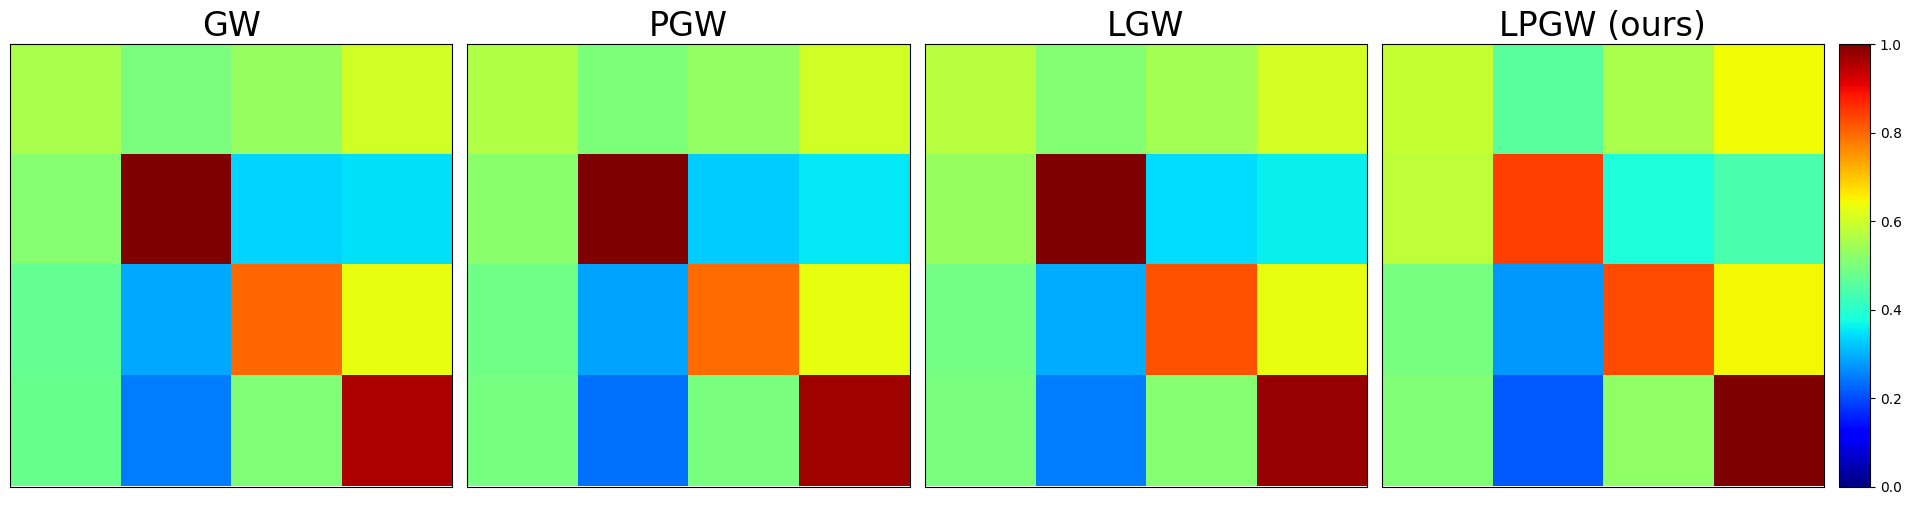

In [93]:
def conf_mat(dists, X, y, n_its = 10000):
    N = len(y)
    classes = np.array(np.unique(y),dtype=int)
    x_pred = []
    x_true = []
    for j in range(n_its):
        l = []
        for i in classes:
            l.append([np.random.choice(X[y == i]),i])
        l = np.array(l)
        for i in range(N):
            tmp1 = np.argmin(dists[i][l[:,0]])
            x_true.append(y[i])
            x_pred.append(classes[tmp1])
    
    conf = sklearn.metrics.confusion_matrix(x_true, x_pred)
    return conf

def plot_conf(confs, labels, shape_labels):
    fig = plt.figure(figsize=(len(confs) * 6, 6))
    min_val, max_val = 0, 1

    grid = ImageGrid(fig, 111,          
                     nrows_ncols=(1,len(confs)),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )
    
    x = [5, 10 + 15, 45, 50 + 15, 85, 90 + 15, 125, 130 + 15]
    plt.setp(grid, xticks=x, xticklabels=shape_labels, yticks=x, yticklabels=shape_labels)
    
    for data, ax, title in zip(confs, grid, labels):
        data = data/np.max(data)
        im = ax.imshow(data, vmin = min_val, vmax = max_val,cmap = "jet")

        ax.set_title(title, fontsize=24)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=18)
        plt.setp(ax.get_yticklabels(), fontsize=18)
    
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)


y = np.array(desired_labels)
conf_gw = conf_mat(gw, X=X, y=y)
conf_pgw = conf_mat(pgw, X=X, y=y)
conf_lgw = conf_mat(lgw, X=X, y=y)
conf_lpgw = conf_mat(lpgw, X=X, y=y)

plot_conf([conf_gw,conf_pgw,conf_lgw,conf_lpgw], [f"GW",f"PGW",f"LGW",f"LPGW (ours)"], shape_labels=shape_labels)
plt.savefig("results/mvp_conf.png", bbox_inches='tight', dpi=300)
plt.show()

In [94]:
conf_gw

array([[152077, 136606, 146333, 164984],
       [140655, 273688,  90913,  94744],
       [128563,  79179, 219118, 173140],
       [131383,  67386, 138434, 262797]])